# Cloning the Repository in Google Colab

In [ ]:
# Clone the repository
!git clone https://github.com/saptarshihalder/Face-Emotion-Detection-in-Manga.git
print("Repository cloned successfully.")
dataset_dir = '/content/Face-Emotion-Detection-in-Manga/manga-facial-expressions'
print(f"Dataset directory set to: {dataset_dir}")

fatal: destination path 'Face-Emotion-Detection-in-Manga' already exists and is not an empty directory.
Repository cloned successfully.
Dataset directory set to: /content/Face-Emotion-Detection-in-Manga/manga-facial-expressions


# Pre-Processing the data and printing some of the data annoted

Starting image preprocessing...
Processing category: happy
Processing category: shock
Processing category: angry
Processing category: sad
Processing category: pleased
Processing category: crying
Processing category: embarrassed
Image preprocessing completed.
Displaying sample images before and after preprocessing...


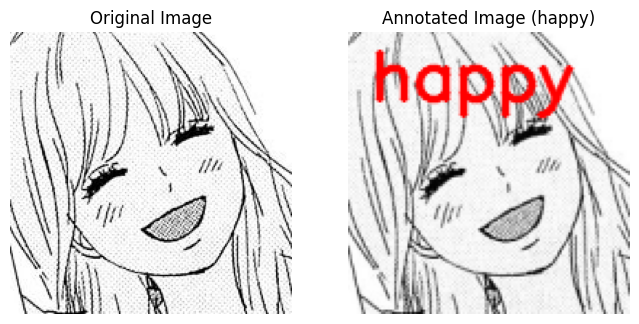

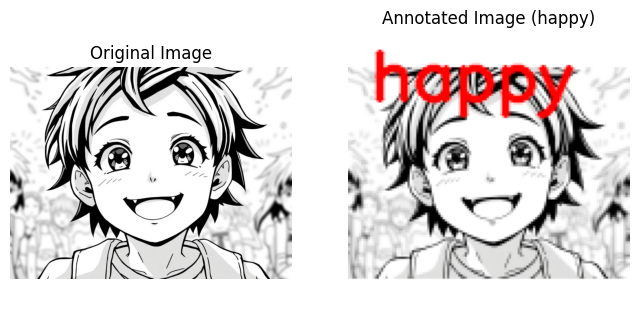

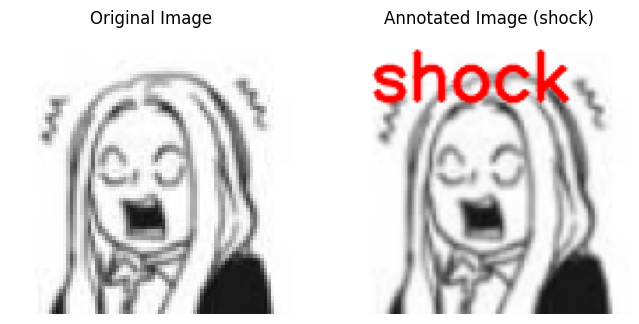

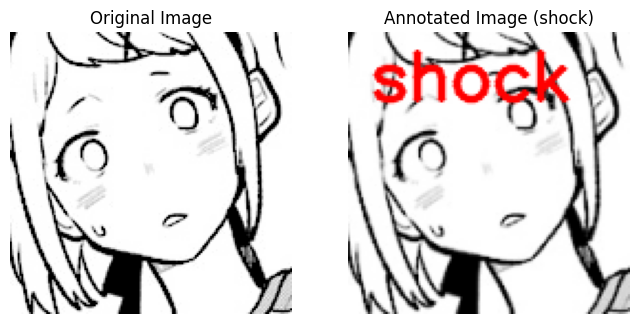

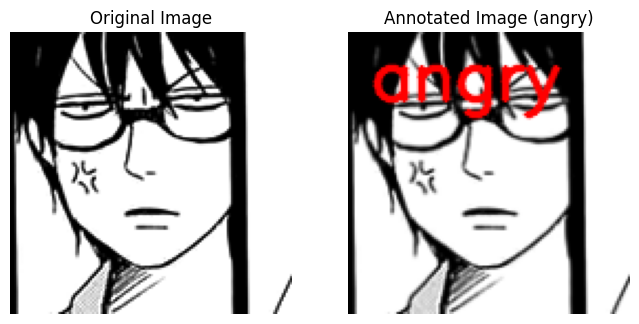

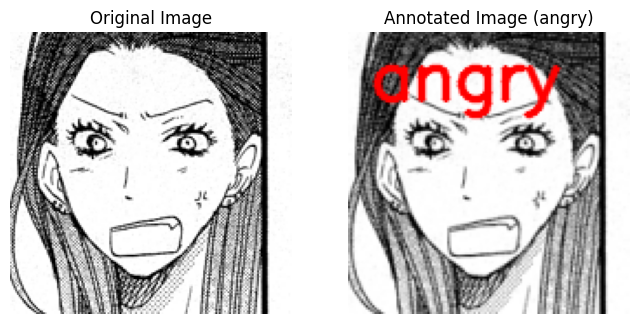

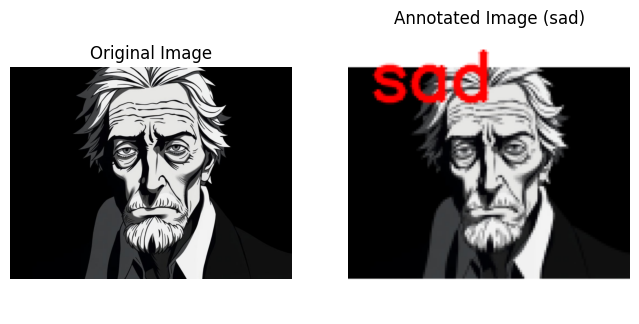

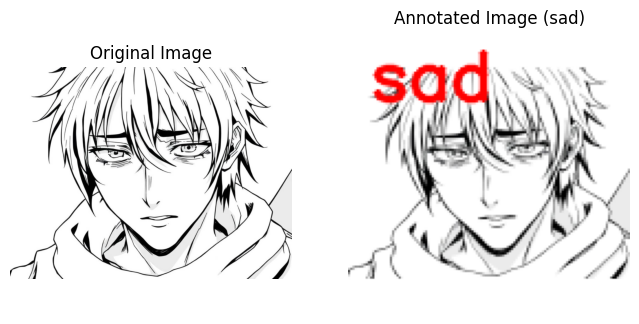

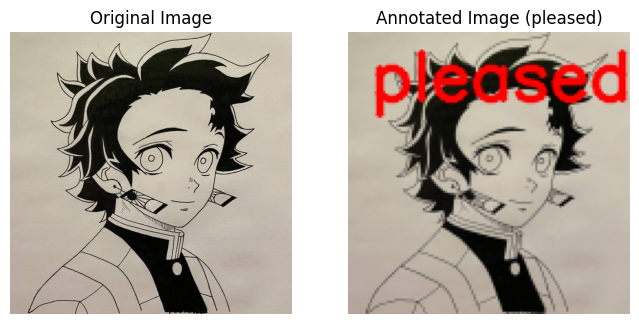

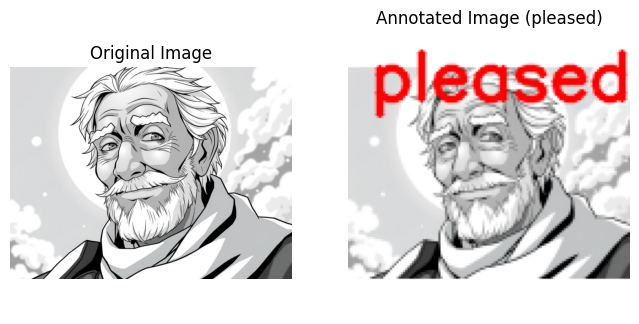

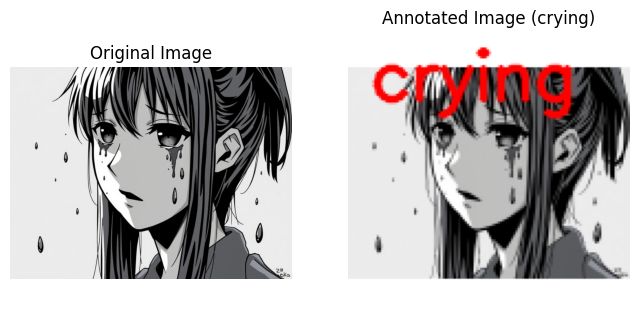

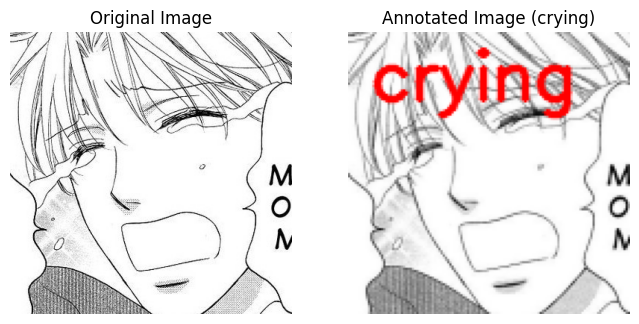

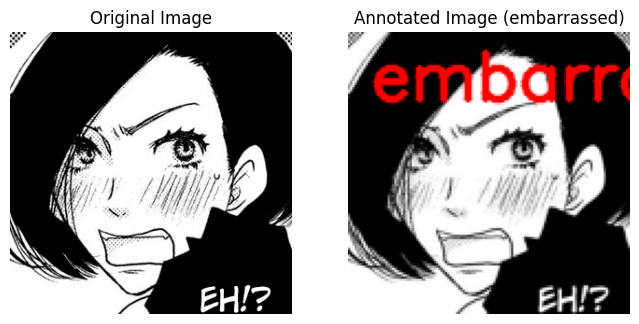

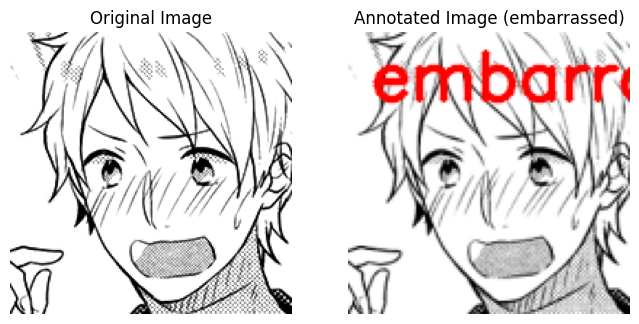

Starting image preprocessing...
Processing category: happy
Processing category: shock
Processing category: angry
Processing category: sad
Processing category: pleased
Processing category: crying
Processing category: embarrassed
Image preprocessing completed.
Displaying sample images before and after preprocessing...


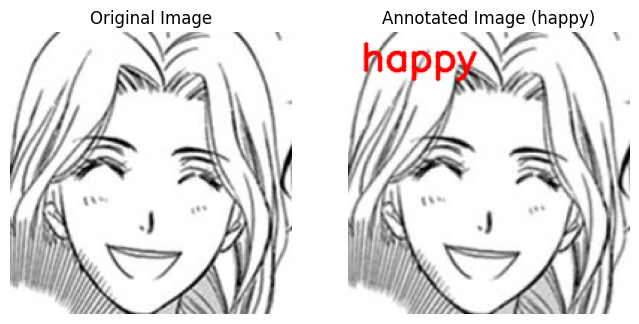

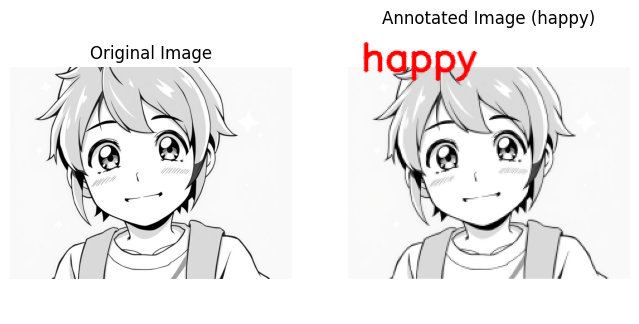

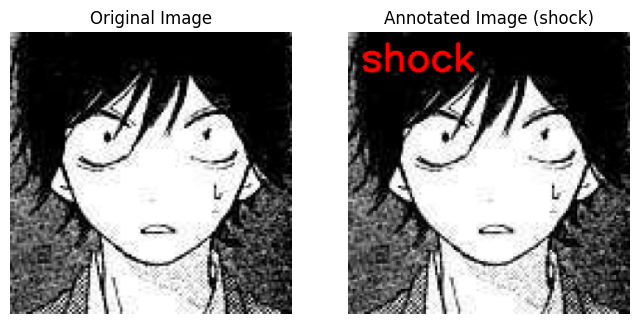

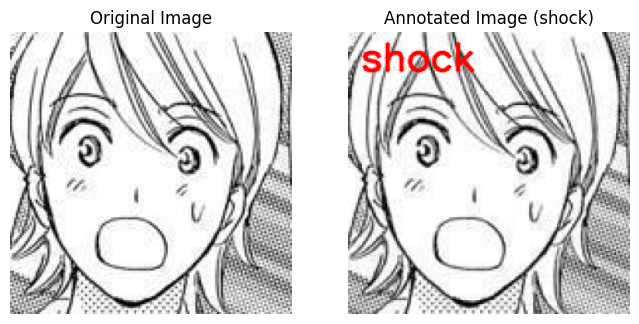

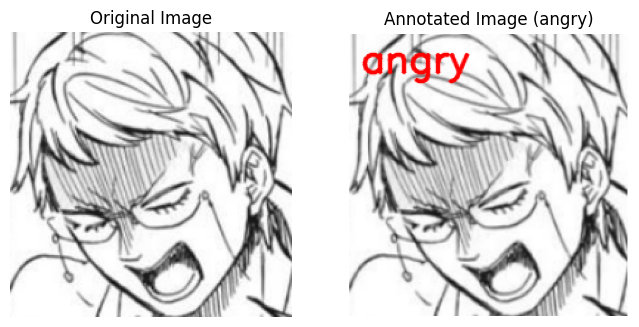

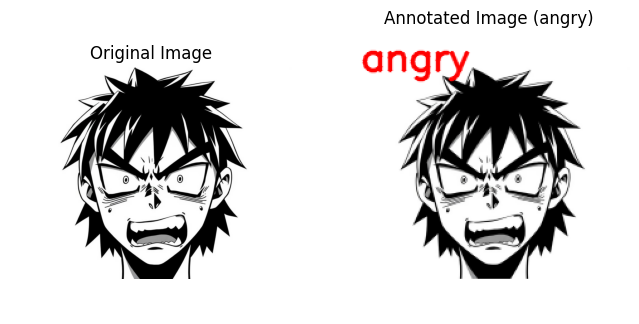

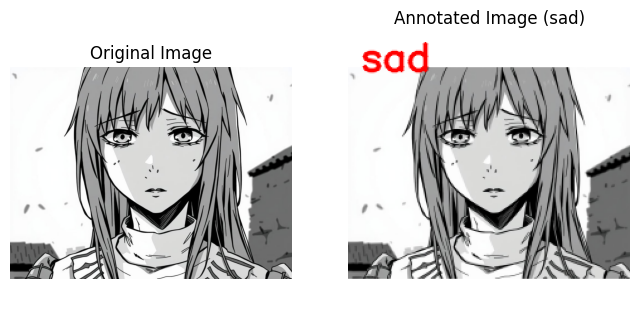

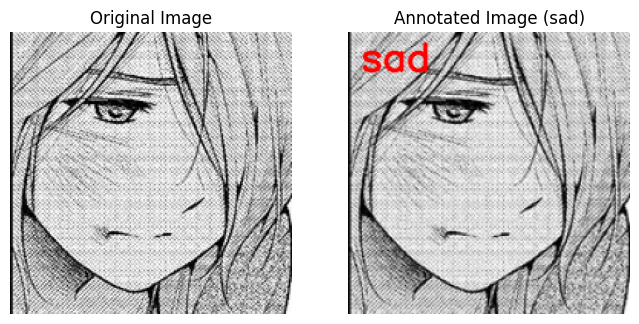

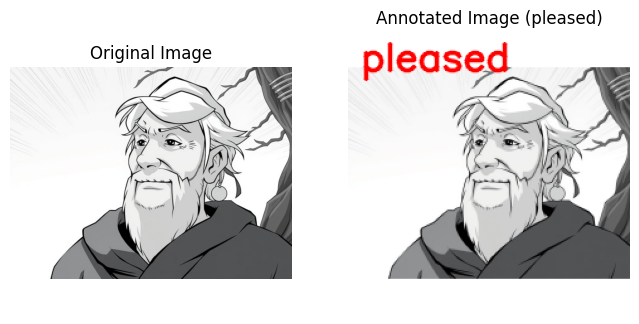

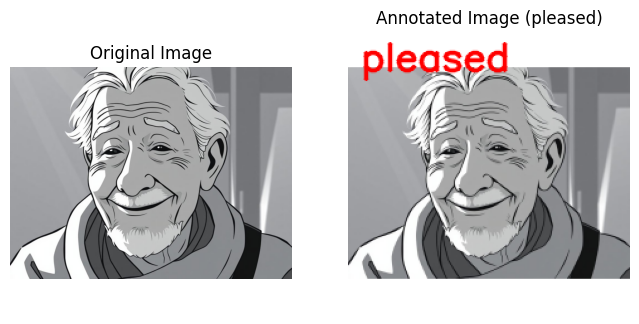

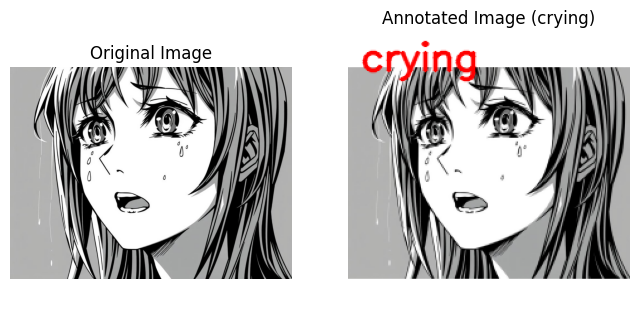

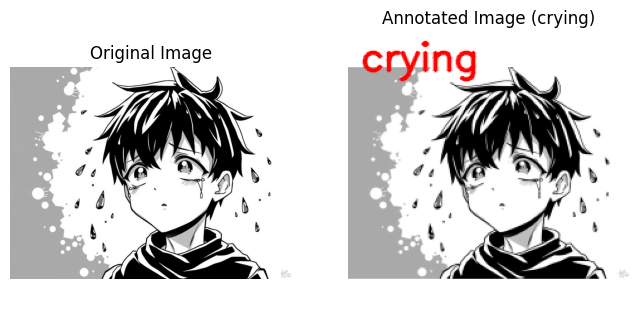

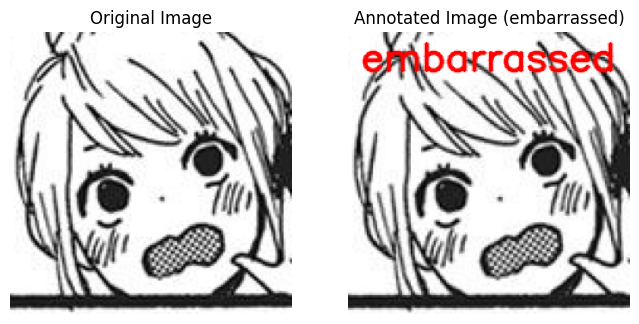

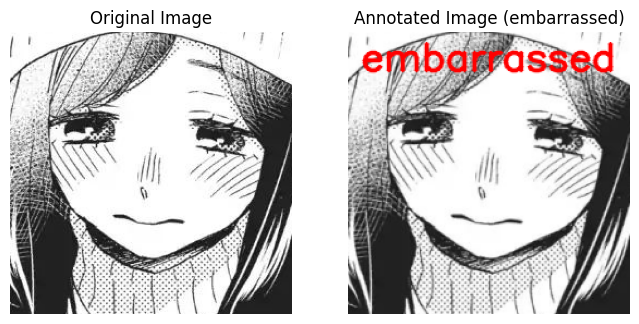

All images preprocessed and saved.


In [ ]:
import cv2
from PIL import Image
import os
import numpy as np
import random
import matplotlib.pyplot as plt

def resize_and_pad_image(img, size, pad_color=255):
    h, w = img.shape[:2]
    sh, sw = size

    # Compute scaling factor and new size to preserve aspect ratio
    aspect = w / h
    if aspect > 1:
        new_w = sw
        new_h = int(new_w / aspect)
    else:
        new_h = sh
        new_w = int(new_h * aspect)

    # Resize the image
    resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Create new image and paste the resized image onto it
    if len(img.shape) == 2:
        # Grayscale image
        new_img = np.full((sh, sw), pad_color, dtype=img.dtype)
    else:
        # Color image
        new_img = np.full((sh, sw, 3), pad_color, dtype=img.dtype)

    y_offset = (sh - new_h) // 2
    x_offset = (sw - new_w) // 2
    new_img[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_img

    return new_img

def preprocess_and_save_images(input_dir, output_dir, target_size):
    print("Starting image preprocessing...")
    os.makedirs(output_dir, exist_ok=True)
    categories = os.listdir(input_dir)
    sample_images = []  # Store tuples of (original_image, annotated_image, category_name)

    for category in categories:
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)
        os.makedirs(output_category_path, exist_ok=True)
        print(f"Processing category: {category}")

        images = os.listdir(category_path)
        random.shuffle(images)

        for idx, img_name in enumerate(images):
            img_path = os.path.join(category_path, img_name)
            try:
                img = cv2.imread(img_path)
                if img is None:
                    print(f"Warning: Unable to read image {img_path}. Skipping.")
                    continue
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                padded_img = resize_and_pad_image(img, target_size)

                # Annotate the image with the category name
                cv2.putText(
                    padded_img,
                    category,  # Text to display (category name)
                    (10, 30),  # Position (bottom-left corner of text)
                    cv2.FONT_HERSHEY_SIMPLEX,  # Font
                    1,  # Font scale
                    (255, 0, 0),  # Text color (red, can adjust if needed)
                    2,  # Thickness
                    cv2.LINE_AA
                )

                output_path = os.path.join(output_category_path, img_name)
                Image.fromarray(padded_img).save(output_path)

                # Collect sample images for display (adjust the number here if needed)
                if idx < 2:
                    sample_images.append((img, padded_img, category))
            except Exception as e:
                print(f"Error processing image {img_path}: {e}")

    print("Image preprocessing completed.")

    # Display sample images before and after preprocessing
    print("Displaying sample images before and after preprocessing...")
    for original, annotated, category in sample_images:
        plt.figure(figsize=(8, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(original)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(annotated)
        plt.title(f'Annotated Image ({category})')
        plt.axis('off')

        plt.show()

# Set your input and output directories and target size
input_dir = "Face-Emotion-Detection-in-Manga/manga-facial-expressions"
output_dir = "processed_manga_facial_expressions"
target_size = (128, 128)

# Call the function
preprocess_and_save_images(input_dir, output_dir, target_size)
input_dir = dataset_dir
output_dir = '/content/preprocessed_dataset'
target_size = (224, 224)  # VGGNet input size

preprocess_and_save_images(input_dir, output_dir, target_size)
print("All images preprocessed and saved.")


# Downloading the repo

In [ ]:
# Download the repository as a ZIP file
!wget https://github.com/saptarshihalder/Face-Emotion-Detection-in-Manga/archive/refs/heads/main.zip

# Unzip the downloaded file
!unzip main.zip


--2024-12-29 17:52:42--  https://github.com/saptarshihalder/Face-Emotion-Detection-in-Manga/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/saptarshihalder/Face-Emotion-Detection-in-Manga/zip/refs/heads/main [following]
--2024-12-29 17:52:42--  https://codeload.github.com/saptarshihalder/Face-Emotion-Detection-in-Manga/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [        <=>         ]  41.41M  28.7MB/s    in 1.4s    

2024-12-29 17:52:44 (28.7 MB/s) - ‘main.zip’ saved [43423746]

Archive:  main.zip
d21a0cbb4ffdafd15e1feb3054aa1332a635e231
   

# Splitting the data

In [ ]:
import shutil
from sklearn.model_selection import StratifiedKFold, train_test_split

def split_dataset(source_dir, output_dir, n_splits=5, test_size=0.2):
    categories = os.listdir(source_dir)

    # Create a directory for the test set
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(test_dir, exist_ok=True)

    # Loop over each category to perform the split
    for category in categories:
        category_path = os.path.join(source_dir, category)
        images = np.array(os.listdir(category_path))
        labels = np.array([category] * len(images))  # Labels for stratified split (same for each category)

        # Split off a test set that won't be used in cross-validation
        train_val_images, test_images = train_test_split(images, test_size=test_size, stratify=labels, random_state=42)

        # Create a test directory for this category and copy test images
        test_category_dir = os.path.join(test_dir, category)
        os.makedirs(test_category_dir, exist_ok=True)
        for img_name in test_images:
            src = os.path.join(category_path, img_name)
            dst = os.path.join(test_category_dir, img_name)
            shutil.copyfile(src, dst)

        # StratifiedKFold for the remaining training/validation images
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        for fold, (train_index, val_index) in enumerate(skf.split(train_val_images, labels[:len(train_val_images)])):
            fold_dir = os.path.join(output_dir, f'fold_{fold+1}')
            train_dir = os.path.join(fold_dir, 'train', category)
            val_dir = os.path.join(fold_dir, 'validation', category)

            # Create directories for the current fold
            os.makedirs(train_dir, exist_ok=True)
            os.makedirs(val_dir, exist_ok=True)

            # Split images for the current fold
            train_images, val_images = train_val_images[train_index], train_val_images[val_index]

            # Copy training images
            for img_name in train_images:
                src = os.path.join(category_path, img_name)
                dst = os.path.join(train_dir, img_name)
                shutil.copyfile(src, dst)

            # Copy validation images
            for img_name in val_images:
                src = os.path.join(category_path, img_name)
                dst = os.path.join(val_dir, img_name)
                shutil.copyfile(src, dst)

            print(f"Fold {fold+1}, Category '{category}': {len(train_images)} images in train, {len(val_images)} images in validation.")

    print(f"Test set created with {test_size * 100}% of data.")

# Set directories
source_dir = '/content/Face-Emotion-Detection-in-Manga-main/manga-facial-expressions'  # Update if running in another environment
output_dir = '/content/data'  # Directory to store cross-validation folds

# Split the dataset using K-Fold Cross-Validation with a separate test set
split_dataset(source_dir, output_dir, test_size=0.2)
print("Dataset split into folds for cross-validation with a separate test set.")


Fold 1, Category 'happy': 64 images in train, 16 images in validation.
Fold 2, Category 'happy': 64 images in train, 16 images in validation.
Fold 3, Category 'happy': 64 images in train, 16 images in validation.
Fold 4, Category 'happy': 64 images in train, 16 images in validation.
Fold 5, Category 'happy': 64 images in train, 16 images in validation.
Fold 1, Category 'shock': 64 images in train, 17 images in validation.
Fold 2, Category 'shock': 65 images in train, 16 images in validation.
Fold 3, Category 'shock': 65 images in train, 16 images in validation.
Fold 4, Category 'shock': 65 images in train, 16 images in validation.
Fold 5, Category 'shock': 65 images in train, 16 images in validation.
Fold 1, Category 'angry': 67 images in train, 17 images in validation.
Fold 2, Category 'angry': 67 images in train, 17 images in validation.
Fold 3, Category 'angry': 67 images in train, 17 images in validation.
Fold 4, Category 'angry': 67 images in train, 17 images in validation.
Fold 5

# End-to-End Model Training, Evaluation, and Sample Detection for Manga Emotion Classification Using VGG16

# Implementing VGG17+

Fold 1, Category 'crying': 67 in train, 17 in validation.
Fold 2, Category 'crying': 67 in train, 17 in validation.
Fold 3, Category 'crying': 67 in train, 17 in validation.
Fold 4, Category 'crying': 67 in train, 17 in validation.
Fold 5, Category 'crying': 68 in train, 16 in validation.
Fold 1, Category 'shock': 64 in train, 17 in validation.
Fold 2, Category 'shock': 65 in train, 16 in validation.
Fold 3, Category 'shock': 65 in train, 16 in validation.
Fold 4, Category 'shock': 65 in train, 16 in validation.
Fold 5, Category 'shock': 65 in train, 16 in validation.
Fold 1, Category 'pleased': 67 in train, 17 in validation.
Fold 2, Category 'pleased': 67 in train, 17 in validation.
Fold 3, Category 'pleased': 67 in train, 17 in validation.
Fold 4, Category 'pleased': 67 in train, 17 in validation.
Fold 5, Category 'pleased': 68 in train, 16 in validation.
Fold 1, Category 'embarrassed': 84 in train, 21 in validation.
Fold 2, Category 'embarrassed': 84 in train, 21 in validation.
Fold

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 810ms/step - accuracy: 0.2415 - loss: 2.6857 - val_accuracy: 0.2708 - val_loss: 1.9384 - learning_rate: 1.0000e-04
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.3350 - loss: 2.0804 - val_accuracy: 0.2604 - val_loss: 1.9454 - learning_rate: 1.0000e-04
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.4764 - loss: 1.6393 - val_accuracy: 0.2396 - val_loss: 2.0770 - learning_rate: 1.0000e-04
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step - accuracy: 0.5364 - loss: 1.4142 - val_accuracy: 0.1979 - val_loss: 2.5144 - learning_rate: 5.0000e-05
Fold 1 - Loss: 1.9379509687423706, Accuracy: 20.83333283662796%

Processing Fold 2
Found 381 validated image filenames belonging to 7 classes.
Found 96 validated image filenames belonging to 7 classes.
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 497ms/step - accuracy: 0.2521 - loss: 2.5454 - val_accuracy: 0.1250 - val_loss: 1.9422 - learning_rate: 1.0000e-04
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.4967 - loss: 1.6495 - val_accuracy: 0.1667 - val_loss: 1.9575 - learning_rate: 1.0000e-04
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.4670 - loss: 1.6459 - val_accuracy: 0.1354 - val_loss: 2.0787 - learning_rate: 1.0000e-04
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - accuracy: 0.4920 - loss: 1.4337 - val_accuracy: 0.1979 - val_loss: 2.1132 - learning_rate: 5.0000e-05
Fold 2 - Loss: 1.9439697265625, Accuracy: 12.5%

Processing Fold 3
Found 382 validated image filenames belonging to 7 classes.
Found 95 validated image filenames belonging to 7 classes.
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



12/12 ━━━━━━━━━━━━━━━━━━━━ 18s 851ms/step - accuracy: 0.2167 - loss: 2.6496 - val_accuracy: 0.1474 - val_loss: 2.3284 - learning_rate: 1.0000e-04
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 282ms/step - accuracy: 0.3898 - loss: 1.9849 - val_accuracy: 0.1368 - val_loss: 2.1811 - learning_rate: 1.0000e-04
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.4243 - loss: 1.6335 - val_accuracy: 0.1474 - val_loss: 3.5606 - learning_rate: 1.0000e-04
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - accuracy: 0.4969 - loss: 1.4133 - val_accuracy: 0.1474 - val_loss: 3.3777 - learning_rate: 1.0000e-04
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.5122 - loss: 1.2688 - val_accuracy: 0.1474 - val_loss: 3.5267 - learning_rate: 5.0000e-05
Fold 3 - Loss: 2.180745840072632, Accuracy: 13.684210181236267%

Processing Fold 4
Found 382 validated image filenames belonging to 7 classes.
Found 95 validated image filenames belonging to 7 classes.
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 607ms/step - accuracy: 0.1901 - loss: 2.7443 - val_accuracy: 0.2000 - val_loss: 1.9405 - learning_rate: 1.0000e-04
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - accuracy: 0.3457 - loss: 2.1346 - val_accuracy: 0.1789 - val_loss: 1.9358 - learning_rate: 1.0000e-04
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.3912 - loss: 1.7851 - val_accuracy: 0.1474 - val_loss: 1.9232 - learning_rate: 1.0000e-04
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.5078 - loss: 1.4261 - val_accuracy: 0.2105 - val_loss: 1.8437 - learning_rate: 1.0000e-04
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.6215 - loss: 1.1432 - val_accuracy: 0.4000 - val_loss: 1.8611 - learning_rate: 1.0000e-04
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.6780 - loss: 0.9837 - val_accuracy: 0.3263 - val_loss: 1.8170 - learning_rate: 1.0000e-04
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - accuracy: 0.7278 - 

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 535ms/step - accuracy: 0.2156 - loss: 2.4920 - val_accuracy: 0.2000 - val_loss: 1.9072 - learning_rate: 1.0000e-04
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.3634 - loss: 1.8742 - val_accuracy: 0.3684 - val_loss: 1.8083 - learning_rate: 1.0000e-04
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.5129 - loss: 1.4126 - val_accuracy: 0.4211 - val_loss: 1.6506 - learning_rate: 1.0000e-04
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.6086 - loss: 1.1708 - val_accuracy: 0.4211 - val_loss: 1.5938 - learning_rate: 1.0000e-04
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.6456 - loss: 0.9731 - val_accuracy: 0.4526 - val_loss: 1.4734 - learning_rate: 1.0000e-04
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.7454 - loss: 0.7497 - val_accuracy: 0.4526 - val_loss: 1.3919 - learning_rate: 1.0000e-04
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.7271 - l

Classification Report:
               precision    recall  f1-score     support
angry          0.629630  0.809524  0.708333   21.000000
crying         0.647059  0.523810  0.578947   21.000000
embarrassed    0.781250  0.925926  0.847458   27.000000
happy          0.592593  0.800000  0.680851   20.000000
pleased        0.600000  0.681818  0.638298   22.000000
sad            0.615385  0.380952  0.470588   21.000000
shock          0.916667  0.523810  0.666667   21.000000
accuracy       0.673203  0.673203  0.673203    0.673203
macro avg      0.683226  0.663691  0.655877  153.000000
weighted avg   0.687119  0.673203  0.663112  153.000000
Found 153 images belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 688ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


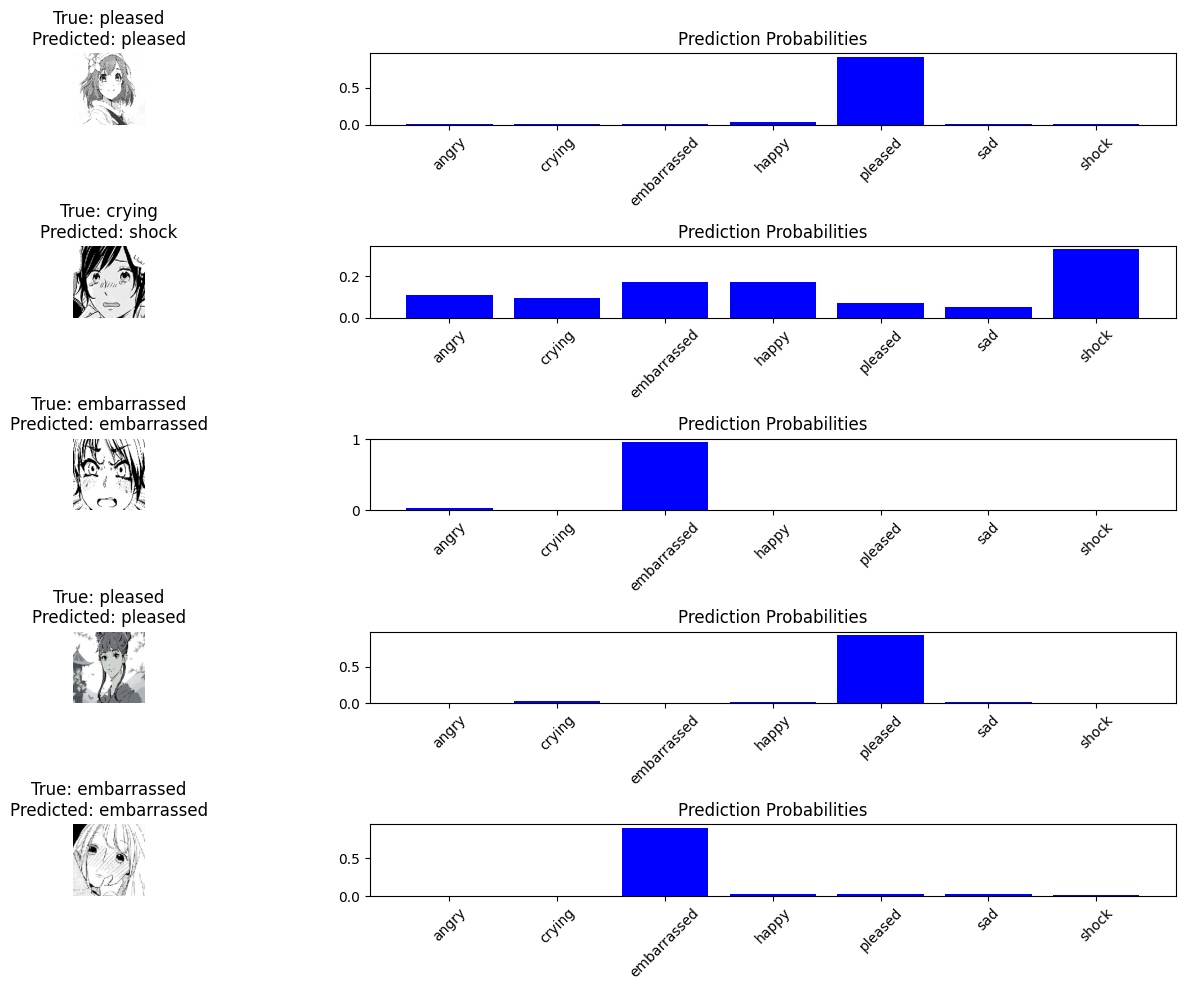

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import LabelEncoder

def build_vgg17_plus(img_height, img_width, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    for layer in base_model.layers[:-8]:  # Unfreeze last 8 layers
        layer.trainable = False

    model = models.Sequential()
    model.add(base_model)

    # Extra convolutional block
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Global average pooling and dense layers
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def split_dataset(source_dir, output_dir, test_size=0.2, n_splits=5):
    categories = os.listdir(source_dir)
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(test_dir, exist_ok=True)

    for category in categories:
        category_path = os.path.join(source_dir, category)
        images = np.array(os.listdir(category_path))
        labels = np.array([category] * len(images))

        # Split a test set
        train_val_images, test_images = train_test_split(images, test_size=test_size, stratify=labels, random_state=42)

        # Create test directory
        test_category_dir = os.path.join(test_dir, category)
        os.makedirs(test_category_dir, exist_ok=True)
        for img_name in test_images:
            src = os.path.join(category_path, img_name)
            dst = os.path.join(test_category_dir, img_name)
            shutil.copyfile(src, dst)

        # Create K-Fold directories for training/validation
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        for fold, (train_index, val_index) in enumerate(skf.split(train_val_images, labels[:len(train_val_images)]), 1):
            fold_dir = os.path.join(output_dir, f'fold_{fold}')
            train_dir = os.path.join(fold_dir, 'train', category)
            val_dir = os.path.join(fold_dir, 'validation', category)
            os.makedirs(train_dir, exist_ok=True)
            os.makedirs(val_dir, exist_ok=True)

            train_images, val_images = train_val_images[train_index], train_val_images[val_index]

            # Copy images for training and validation
            for img_name in train_images:
                src = os.path.join(category_path, img_name)
                dst = os.path.join(train_dir, img_name)
                shutil.copyfile(src, dst)

            for img_name in val_images:
                src = os.path.join(category_path, img_name)
                dst = os.path.join(val_dir, img_name)
                shutil.copyfile(src, dst)

            print(f"Fold {fold}, Category '{category}': {len(train_images)} in train, {len(val_images)} in validation.")

    print(f"Test set created with {test_size * 100}% of data.")

def kfold_cross_validation(train_dir, n_splits=5, batch_size=32, img_height=128, img_width=128):
    datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=10)
    categories = os.listdir(train_dir)
    X, y = [], []
    for category in categories:
        category_path = os.path.join(train_dir, category)
        images = [os.path.join(category_path, img) for img in os.listdir(category_path)]
        X.extend(images)
        y.extend([category] * len(images))
    X, y = np.array(X), np.array(y)

    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    class_labels = list(label_encoder.classes_)
    y_str = label_encoder.inverse_transform(y_encoded)

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    acc_per_fold, loss_per_fold, histories = [], [], []

    for fold_no, (train_index, val_index) in enumerate(skf.split(X, y_encoded), 1):
        print(f'\nProcessing Fold {fold_no}')

        train_df = pd.DataFrame({'filename': X[train_index], 'class': y_str[train_index]})
        val_df = pd.DataFrame({'filename': X[val_index], 'class': y_str[val_index]})

        train_gen = datagen.flow_from_dataframe(
            train_df, x_col='filename', y_col='class',
            target_size=(img_height, img_width), batch_size=batch_size,
            class_mode='categorical', shuffle=True
        )
        val_gen = datagen.flow_from_dataframe(
            val_df, x_col='filename', y_col='class',
            target_size=(img_height, img_width), batch_size=batch_size,
            class_mode='categorical', shuffle=False
        )

        model = build_vgg17_plus(img_height, img_width, len(class_labels))
        model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
                      loss='categorical_crossentropy', metrics=['accuracy'])

        callbacks = [
            EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
        ]

        history = model.fit(train_gen, epochs=15, validation_data=val_gen, callbacks=callbacks)
        histories.append(history)

        scores = model.evaluate(val_gen, verbose=0)
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        print(f"Fold {fold_no} - Loss: {scores[0]}, Accuracy: {scores[1] * 100}%")

    return acc_per_fold, loss_per_fold, histories, model, class_labels

def evaluate_and_confusion_matrix(model, test_dir, class_labels, img_height=128, img_width=128):
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir, target_size=(img_height, img_width),
        batch_size=32, class_mode='categorical', shuffle=False
    )

    predictions = model.predict(test_generator, verbose=0)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    cm = confusion_matrix(true_classes, predicted_classes)
    fig = px.imshow(cm, x=class_labels, y=class_labels, color_continuous_scale='Blues', text_auto=True)
    fig.update_layout(title="Confusion Matrix", xaxis_title="Predicted", yaxis_title="True")
    fig.show()

    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    print("Classification Report:\n", report_df)

def sample_detection(model, test_dir, class_labels, img_height=128, img_width=128, num_samples=5):
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir, target_size=(img_height, img_width),
        batch_size=1, class_mode='categorical', shuffle=True
    )

    plt.figure(figsize=(15, num_samples * 2))

    for i in range(num_samples):
        img, true_label = next(test_generator)  # Corrected to use next()
        true_label = np.argmax(true_label, axis=1)[0]
        prediction = model.predict(img)
        predicted_label = np.argmax(prediction, axis=1)[0]

        true_class = class_labels[true_label]
        predicted_class = class_labels[predicted_label]

        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(img[0])
        plt.axis('off')
        plt.title(f"True: {true_class}\nPredicted: {predicted_class}")

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.bar(class_labels, prediction[0], color='blue')
        plt.title("Prediction Probabilities")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Set directories
source_dir = '/content/Face-Emotion-Detection-in-Manga-main/manga-facial-expressions'
output_dir = '/content/data'

# Create test set and cross-validation folds
split_dataset(source_dir, output_dir)

# Perform K-Fold Cross-Validation on the training data
train_dir = os.path.join(output_dir, 'fold_1/train')
acc_per_fold, loss_per_fold, histories, model, class_labels = kfold_cross_validation(train_dir)

# Evaluate on the separate test set
test_dir = os.path.join(output_dir, 'test')
evaluate_and_confusion_matrix(model, test_dir, class_labels, img_height=128, img_width=128)

# Display sample detections
sample_detection(model, test_dir, class_labels, img_height=128, img_width=128, num_samples=5)


# Saving the models

TensorFlow Version: 2.17.1
Total images found: 751
                                            filepath label
0  /content/Face-Emotion-Detection-in-Manga-main/...   sad
1  /content/Face-Emotion-Detection-in-Manga-main/...   sad
2  /content/Face-Emotion-Detection-in-Manga-main/...   sad
3  /content/Face-Emotion-Detection-in-Manga-main/...   sad
4  /content/Face-Emotion-Detection-in-Manga-main/...   sad
Training + Validation samples: 600
Test samples: 151
Training samples: 480
Validation samples: 120
Found 480 validated image filenames belonging to 7 classes.
Found 120 validated image filenames belonging to 7 classes.
Found 151 validated image filenames belonging to 7 classes.
Number of classes: 7
Class indices: {'angry': 0, 'crying': 1, 'embarrassed': 2, 'happy': 3, 'pleased': 4, 'sad': 5, 'shock': 6}
Model VGG16_final.keras already exists. Loading the model...
VGG16 Model Loaded Successfully.
Model VGG17_plus_final.keras already exists. Loading the model...
VGG17+ Model Loaded Successf

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 50s 9s/step
Predicting with VGG17+ Model...
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step

VGG16 Accuracy: 35.10%
VGG17+ Accuracy: 37.09%

VGG16 Classification Report:
               precision    recall  f1-score   support

       angry       0.38      0.57      0.45        21
      crying       0.30      0.14      0.19        21
 embarrassed       0.28      0.74      0.40        27
       happy       0.67      0.30      0.41        20
     pleased       0.44      0.52      0.48        21
         sad       0.33      0.05      0.09        20
       shock       0.00      0.00      0.00        21

    accuracy                           0.35       151
   macro avg       0.34      0.33      0.29       151
weighted avg       0.34      0.35      0.29       151

VGG17+ Classification Report:
               precision    recall  f1-score   support

       angry       0.80      0.19      0.31        21
      crying       0.00      0.00      0.00        21
 embarrassed       0.32 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

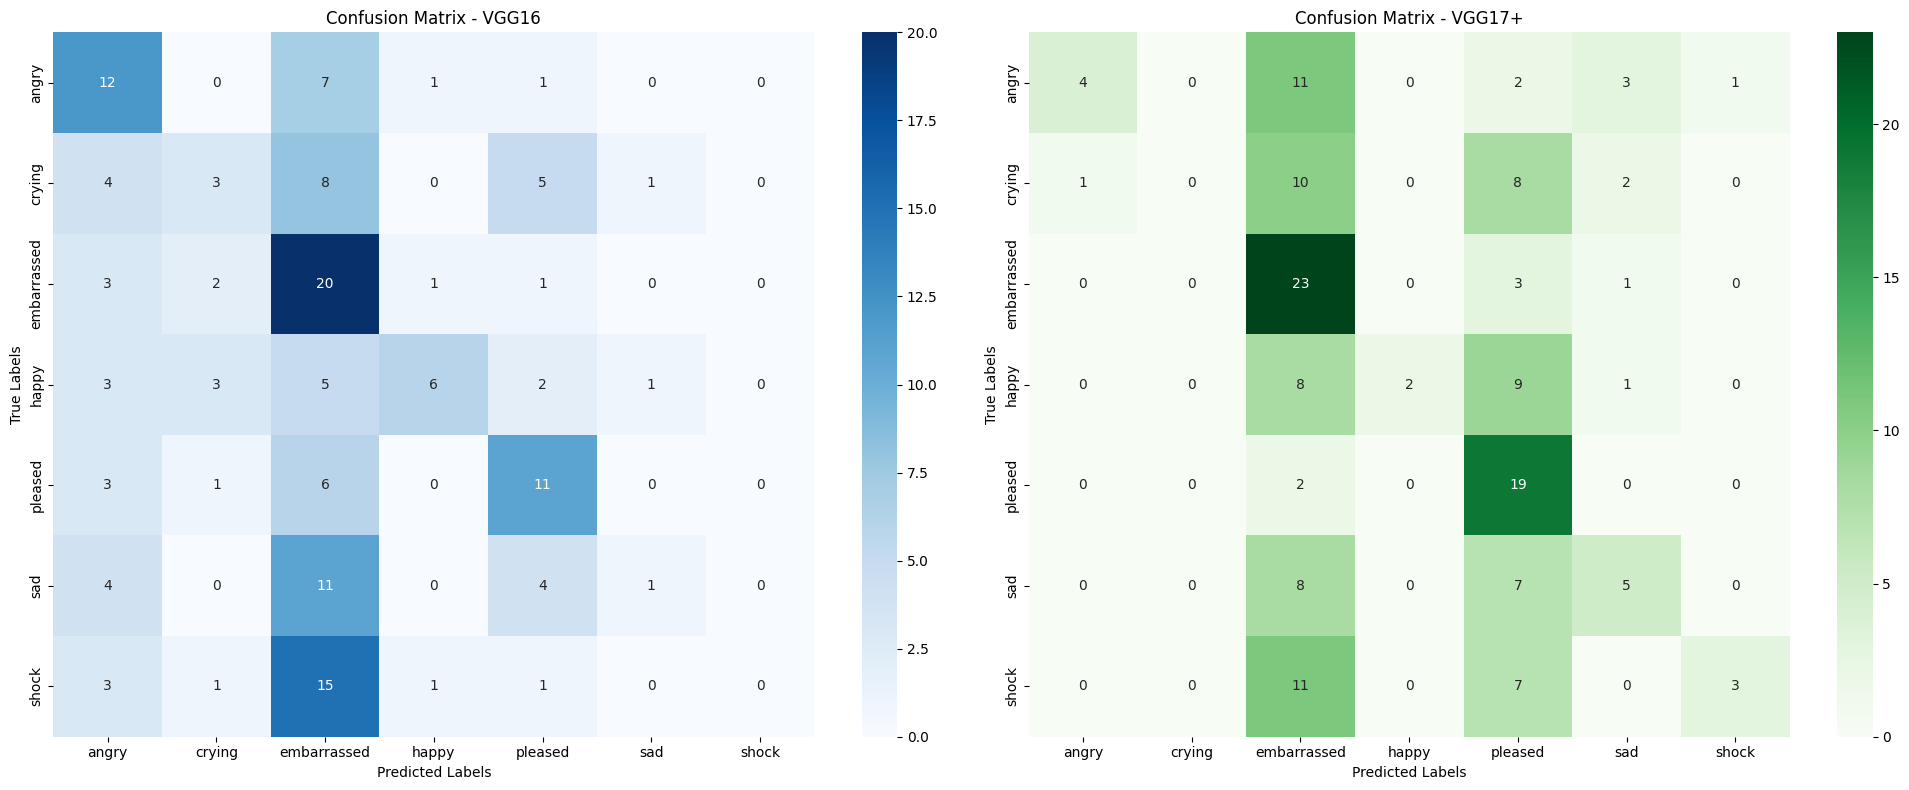

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# Verify TensorFlow version
print(f"TensorFlow Version: {tf.__version__}")
# Ensure TensorFlow is at least version 2.x
assert tf.__version__.startswith('2'), "TensorFlow 2.x is required."

# --------------------------------------------
# Step 1: Define Paths and Parameters
# --------------------------------------------

# Update the source_dir with the path to your dataset
source_dir = '/content/Face-Emotion-Detection-in-Manga-main/manga-facial-expressions'

img_height, img_width = 128, 128  # Image dimensions
batch_size = 32                   # Batch size for training
epochs = 10                       # Number of training epochs

# --------------------------------------------
# Step 2: Create a DataFrame with File Paths and Labels
# --------------------------------------------

def create_dataframe(source_dir):
    """
    Scans the source directory and creates a DataFrame
    containing file paths and corresponding labels.
    """
    data = []
    categories = [d for d in os.listdir(source_dir) if os.path.isdir(os.path.join(source_dir, d))]
    for category in categories:
        category_path = os.path.join(source_dir, category)
        images = os.listdir(category_path)
        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            # Ensure that the file is an image
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                data.append({'filepath': img_path, 'label': category})
    df = pd.DataFrame(data)
    return df

df = create_dataframe(source_dir)
print(f"Total images found: {len(df)}")
print(df.head())

# --------------------------------------------
# Step 3: Split DataFrame into Training, Validation, and Test Sets
# --------------------------------------------

# Split into train_val (80%) and test (20%)
train_val_df, test_df = train_test_split(
    df,
    test_size=0.2,
    stratify=df['label'],
    random_state=42
)
print(f"Training + Validation samples: {len(train_val_df)}")
print(f"Test samples: {len(test_df)}")

# Further split train_val into train (64%) and validation (16%)
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.2,
    stratify=train_val_df['label'],
    random_state=42
)
print(f"Training samples: {len(train_df)}")
print(f"Validation samples: {len(val_df)}")

# --------------------------------------------
# Step 4: Data Augmentation and Generators
# --------------------------------------------

# Training data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and Test data should not be augmented
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_dataframe(
    val_df,
    x_col='filepath',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for evaluation
)

# Get number of classes
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")
print(f"Class indices: {train_generator.class_indices}")

# --------------------------------------------
# Step 5: Define Models using the Functional API
# --------------------------------------------

def build_vgg16_model(img_height, img_width, num_classes):
    """
    Builds a VGG16-based model using the Functional API.
    """
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Freeze the base model

    inputs = layers.Input(shape=(img_height, img_width, 3))
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def build_vgg17_plus_model(img_height, img_width, num_classes):
    """
    Builds an enhanced VGG16-based model with additional convolutional layers.
    """
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Freeze the base model

    inputs = layers.Input(shape=(img_height, img_width, 3))
    x = base_model(inputs, training=False)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# --------------------------------------------
# Step 6: Define Callbacks
# --------------------------------------------

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
]

# --------------------------------------------
# Step 7: Train and Save Models
# --------------------------------------------

# Function to save model in Keras native format
def save_model_keras_format(model, save_path):
    """
    Saves the Keras model in the native .keras format.
    """
    model.save(save_path, save_format='keras')
    print(f"Model saved to {save_path}")

# Function to save model in HDF5 format (alternative)
def save_model_h5_format(model, save_path):
    """
    Saves the Keras model in the HDF5 .h5 format.
    """
    model.save(save_path, save_format='h5')
    print(f"Model saved to {save_path}")

# Function to load model based on file extension
def load_model_by_extension(save_path):
    """
    Loads the Keras model based on the file extension.
    """
    if save_path.endswith('.keras'):
        return load_model(save_path)
    elif save_path.endswith('.h5'):
        return load_model(save_path)
    else:
        raise ValueError("Unsupported file format. Use '.keras' or '.h5'.")

# Paths to save models
vgg16_save_path = 'VGG16_final.keras'       # File name with .keras extension
vgg17_plus_save_path = 'VGG17_plus_final.keras'  # File name with .keras extension

# Train and save VGG16 model
if os.path.exists(vgg16_save_path):
    print(f"Model {vgg16_save_path} already exists. Loading the model...")
    vgg16_model = load_model_by_extension(vgg16_save_path)
    print("VGG16 Model Loaded Successfully.")
else:
    print("\nTraining VGG16 Model...")
    vgg16_model = build_vgg16_model(img_height, img_width, num_classes)
    vgg16_history = vgg16_model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )
    # Save VGG16 model in .keras format
    save_model_keras_format(vgg16_model, vgg16_save_path)

# Train and save VGG17+ model
if os.path.exists(vgg17_plus_save_path):
    print(f"Model {vgg17_plus_save_path} already exists. Loading the model...")
    vgg17_plus_model = load_model_by_extension(vgg17_plus_save_path)
    print("VGG17+ Model Loaded Successfully.")
else:
    print("\nTraining VGG17+ Model...")
    vgg17_plus_model = build_vgg17_plus_model(img_height, img_width, num_classes)
    vgg17_plus_history = vgg17_plus_model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=epochs,
        callbacks=callbacks,
        verbose=1
    )
    # Save VGG17+ model in .keras format
    save_model_keras_format(vgg17_plus_model, vgg17_plus_save_path)

# Prepare true labels
true_labels = test_generator.classes
class_labels = list(train_generator.class_indices.keys())

# Get predictions for VGG16
print("\nPredicting with VGG16 Model...")
predictions_vgg16 = vgg16_model.predict(test_generator, verbose=1)
predicted_labels_vgg16 = np.argmax(predictions_vgg16, axis=1)

# Get predictions for VGG17+
print("Predicting with VGG17+ Model...")
predictions_vgg17 = vgg17_plus_model.predict(test_generator, verbose=1)
predicted_labels_vgg17 = np.argmax(predictions_vgg17, axis=1)

# Calculate accuracy
accuracy_vgg16 = accuracy_score(true_labels, predicted_labels_vgg16)
accuracy_vgg17 = accuracy_score(true_labels, predicted_labels_vgg17)
print(f"\nVGG16 Accuracy: {accuracy_vgg16 * 100:.2f}%")
print(f"VGG17+ Accuracy: {accuracy_vgg17 * 100:.2f}%")

# Classification reports
print("\nVGG16 Classification Report:\n", classification_report(true_labels, predicted_labels_vgg16, target_names=class_labels))
print("VGG17+ Classification Report:\n", classification_report(true_labels, predicted_labels_vgg17, target_names=class_labels))

# --------------------------------------------
# Step 9: Plot Confusion Matrices
# --------------------------------------------

# Generate confusion matrices
cm_vgg16 = confusion_matrix(true_labels, predicted_labels_vgg16)
cm_vgg17 = confusion_matrix(true_labels, predicted_labels_vgg17)

# Plot using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Confusion Matrix for VGG16
sns.heatmap(cm_vgg16, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - VGG16")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Confusion Matrix for VGG17+
sns.heatmap(cm_vgg17, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - VGG17+")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

# --------------------------------------------
# Step 10: Plot Accuracy Comparison
# --------------------------------------------

fig = go.Figure()
fig.add_trace(go.Bar(
    x=['VGG16', 'VGG17+'],
    y=[accuracy_vgg16 * 100, accuracy_vgg17 * 100],
    name='Accuracy',
    marker_color=['#1f77b4', '#2ca02c']
))

fig.update_layout(
    title="Model Accuracy Comparison",
    xaxis_title="Model",
    yaxis_title="Accuracy (%)",
    template="plotly_white",
    yaxis=dict(range=[0, 100])
)

fig.show()


# Comparing the models

In [ ]:
import os
print(os.listdir('.'))


['.config', 'Face-Emotion-Detection-in-Manga', 'Face-Emotion-Detection-in-Manga-main', 'main.zip', 'sample_data']


Running on TPU
Number of replicas: 8

Starting training...

Epoch 1/50
33/33 [==============================] - 19s 279ms/step - loss: 12.4962 - accuracy: 0.1160 - val_loss: 7.5931 - val_accuracy: 0.1930 - lr: 1.0000e-05
Epoch 2/50
33/33 [==============================] - 3s 97ms/step - loss: 10.6017 - accuracy: 0.1407 - val_loss: 6.3006 - val_accuracy: 0.1930 - lr: 1.0000e-05
Epoch 3/50
33/33 [==============================] - 3s 97ms/step - loss: 10.7396 - accuracy: 0.1179 - val_loss: 5.5608 - val_accuracy: 0.2105 - lr: 1.0000e-05
Epoch 4/50
33/33 [==============================] - 3s 82ms/step - loss: 10.3621 - accuracy: 0.1388 - val_loss: 5.0555 - val_accuracy: 0.2105 - lr: 1.0000e-05
Epoch 5/50
33/33 [==============================] - 3s 94ms/step - loss: 9.1438 - accuracy: 0.1768 - val_loss: 4.7805 - val_accuracy: 0.2281 - lr: 1.0000e-05
Epoch 6/50
33/33 [==============================] - 3s 96ms/step - loss: 8.8414 - accuracy: 0.1578 - val_loss: 4.5905 - val_accuracy: 0.2456 - l

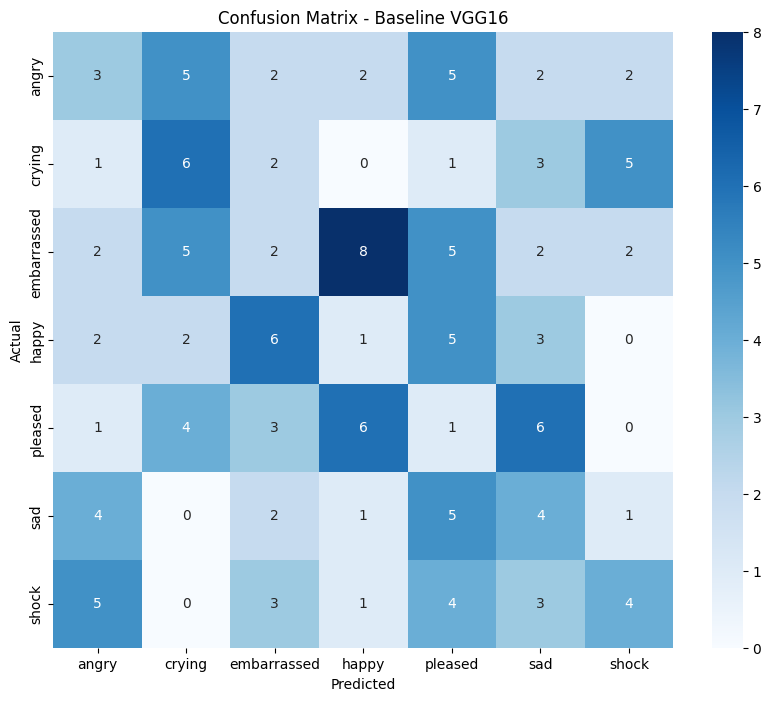

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn.utils.class_weight import compute_class_weight  # Keep commented out until stable

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, Dense, Input, Dropout
)
from tensorflow.keras.models import Model
# from tensorflow.keras.regularizers import l2  # Remove or reduce for simplicity
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# -----------------------------
#   TPU / GPU Strategy
# -----------------------------
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Running on TPU")
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except:
    print("TPU not found, defaulting to CPU/GPU.")
    strategy = tf.distribute.get_strategy()

print("Number of replicas:", strategy.num_replicas_in_sync)

# -----------------------------
#  HYPERPARAMETERS & PATHS
# -----------------------------
source_dir = '/content/Face-Emotion-Detection-in-Manga-main/manga-facial-expressions'
img_height, img_width = 128, 128
batch_size = 16
epochs = 50
vgg17_plus_save_path = 'VGG17_plus_model.keras'

# -----------------------------
#  VALIDATE DATASET
# -----------------------------
def validate_dataset(source_dir):
    valid_files = []
    categories = sorted([
        d for d in os.listdir(source_dir)
        if os.path.isdir(os.path.join(source_dir, d))
    ])

    for category in categories:
        category_path = os.path.join(source_dir, category)
        images = os.listdir(category_path)
        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    img = Image.open(img_path)
                    img.verify()
                    valid_files.append({'filepath': img_path, 'label': category})
                except Exception:
                    print(f"Invalid image detected: {img_path}")
    return pd.DataFrame(valid_files)

# -----------------------------
#  IMAGE LOADING & PREPROCESS
# -----------------------------
def load_and_preprocess_image(path, label):
    """
    Loads an image, decodes it, resizes it, and applies VGG16 'preprocess_input'.
    """
    try:
        image = tf.io.read_file(path)
        image = tf.image.decode_image(image, channels=3, expand_animations=False)
        image = tf.cast(image, tf.float32)  # cast to float32
        image = tf.image.resize(image, [img_height, img_width])
        # IMPORTANT: do NOT do image/255.0 if you're using preprocess_input for VGG16
        image = preprocess_input(image)
        return image, label
    except Exception as e:
        print(f"Error reading image {path}: {e}")
        # Return a zero image if there's an error
        return tf.zeros([img_height, img_width, 3]), label

def augment(image, label):
    """
    Minimal augmentation: random horizontal flip only.
    Removing random_brightness to avoid potential numeric extremes.
    """
    image = tf.image.random_flip_left_right(image)
    return image, label

# -----------------------------
#   CREATE TF.DATA DATASETS
# -----------------------------
def create_dataset(df, is_training=True):
    dataset = tf.data.Dataset.from_tensor_slices((df['filepath'].values, df['label_index'].values))
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

    # Filter out "dummy" zero images
    dataset = dataset.filter(lambda img, lbl: tf.reduce_sum(img) > 0)

    if is_training:
        dataset = dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.batch(batch_size, drop_remainder=False)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# -----------------------------
#  BUILD PLAIN VGG16 MODEL
# -----------------------------
def build_vgg16_baseline(input_shape=(128, 128, 3), num_classes=5):
    """
    A simple baseline using VGG16 (frozen) + GlobalAveragePooling + Dense.
    No fractal blocks or BatchNorm here.
    """
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze entire VGG16 for initial debugging
    for layer in base_model.layers:
        layer.trainable = False

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    # Removed L2 regularizer for simplicity, but you can reintroduce if stable
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs, name="VGG16_Baseline")

# -----------------------------
#        MAIN SCRIPT
# -----------------------------
df = validate_dataset(source_dir)

# Split the data
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df['label'], random_state=42)

label_names = sorted(train_df['label'].unique())
label_to_index = {name: idx for idx, name in enumerate(label_names)}

train_df['label_index'] = train_df['label'].map(label_to_index)
val_df['label_index']   = val_df['label'].map(label_to_index)
test_df['label_index']  = test_df['label'].map(label_to_index)
num_classes = len(label_names)

train_ds = create_dataset(train_df, is_training=True)
val_ds   = create_dataset(val_df, is_training=False)
test_ds  = create_dataset(test_df, is_training=False)

# If your dataset is extremely imbalanced, reintroduce class_weights later
# once you confirm no NaNs:
# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(train_df['label_index']),
#     y=train_df['label_index'].values
# )
# class_weights = dict(enumerate(class_weights))

with strategy.scope():
    model = build_vgg16_baseline(input_shape=(img_height, img_width, 3), num_classes=num_classes)
    optimizer = Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

callbacks = [
    EarlyStopping(patience=20, restore_best_weights=True, monitor='val_accuracy'),
    ReduceLROnPlateau(patience=5, factor=0.2, min_lr=1e-6, monitor='val_accuracy'),
    ModelCheckpoint(vgg17_plus_save_path, save_best_only=True, monitor='val_accuracy')
]

print("\nStarting training...\n")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks,
    # class_weight=class_weights,  # Keep commented out until stable
    verbose=1
)

# -----------------------------
#   EVALUATE ON TEST SET
# -----------------------------
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1]:.2f}")

# -----------------------------
#   CONFUSION MATRIX
# -----------------------------
def plot_confusion_matrix(model, test_dataset, label_names, title):
    y_true = []
    y_pred = []

    for images, labels_ in test_dataset:
        preds = model.predict(images, verbose=0)
        y_pred.extend(np.argmax(preds, axis=1))
        y_true.extend(labels_.numpy())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names, yticklabels=label_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(model, test_ds, label_names, "Confusion Matrix - Baseline VGG16")


VGG 17+

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import (
    GlobalAveragePooling2D, Dense, Input, Dropout, Conv2D, Add, DepthwiseConv2D,
    LayerNormalization, Activation, Multiply, BatchNormalization, MaxPooling2D, Concatenate, UpSampling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
)

import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# -----------------------------
#   TPU / GPU Strategy
# -----------------------------
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Running on TPU")
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except:
    print("TPU not found, defaulting to CPU/GPU.")
    strategy = tf.distribute.get_strategy()

print("Number of replicas:", strategy.num_replicas_in_sync)

# -----------------------------
#  HYPERPARAMETERS & PATHS
# -----------------------------
source_dir = '/content/Face-Emotion-Detection-in-Manga-main/manga-facial-expressions'
img_height, img_width = 128, 128
batch_size = 32
epochs = 100
vgg17_plus_save_path = 'VGG17_plus_model.keras'

# -----------------------------
#  VALIDATE DATASET
# -----------------------------
def validate_dataset(source_dir):
    valid_files = []
    categories = sorted([
        d for d in os.listdir(source_dir)
        if os.path.isdir(os.path.join(source_dir, d))
    ])

    for category in categories:
        category_path = os.path.join(source_dir, category)
        images = os.listdir(category_path)
        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                try:
                    img = Image.open(img_path)
                    img.verify()
                    valid_files.append({'filepath': img_path, 'label': category})
                except Exception:
                    print(f"Invalid image detected: {img_path}")
    return pd.DataFrame(valid_files)

# -----------------------------
#  IMAGE LOADING & PREPROCESS
# -----------------------------
def load_and_preprocess_image(path, label):
    try:
        image = tf.io.read_file(path)
        image = tf.image.decode_image(image, channels=3, expand_animations=False)
        image = tf.cast(image, tf.float32)
        image = tf.image.resize(image, [img_height, img_width])
        image = preprocess_input(image)
        return image, label
    except Exception as e:
        print(f"Error reading image {path}: {e}")
        return tf.zeros([img_height, img_width, 3]), label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    return image, label

# -----------------------------
#   CREATE TF.DATA DATASETS
# -----------------------------
def create_dataset(df, is_training=True):
    dataset = tf.data.Dataset.from_tensor_slices((df['filepath'].values, df['label_index'].values))
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.filter(lambda img, lbl: tf.reduce_sum(img) > 0)

    if is_training:
        dataset = dataset.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.batch(batch_size, drop_remainder=False)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

# -----------------------------
#  VGG16 MODIFIED BASE
# -----------------------------
def vgg16_modified_base(input_tensor):
    """
    Modified VGG16 base with additional feature extraction layers and pooling.
    """
    base_model = VGG16(weights="imagenet", include_top=False, input_tensor=input_tensor)

    for layer in base_model.layers[:-4]:
        layer.trainable = False

    x = base_model.output

    # Additional layers for enhanced feature extraction
    x = Conv2D(256, kernel_size=3, padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
    return x

# -----------------------------
#  YOLO-TINY BLOCK
# -----------------------------
def yolo_tiny_block(input_tensor):
    """
    YOLO-Tiny-inspired block for feature extraction.
    """
    x = Conv2D(128, kernel_size=3, padding="same", activation="relu")(input_tensor)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
    return x

# -----------------------------
#  ANIME OBJECT DETECTION BLOCK
# -----------------------------
def anime_object_detection_block(input_tensor):
    """
    Anime-specific object detection block for tailored feature extraction.
    """
    x = Conv2D(128, kernel_size=5, padding="same", activation="relu")(input_tensor)
    x = BatchNormalization()(x)
    x = Conv2D(128, kernel_size=3, padding="same", activation="relu")(x)
    x = MaxPooling2D(pool_size=2, strides=2, padding="same")(x)
    return x

# -----------------------------
#  BUILD VGG17+ MODEL WITH INTEGRATION
# -----------------------------
def build_vgg17_plus(input_shape=(128, 128, 3), num_classes=5):
    """
    VGG17+ with integrated YOLO-Tiny and Anime Object Detection blocks.
    """
    inputs = Input(shape=input_shape)

    # Modified VGG16 base
    vgg_features = vgg16_modified_base(inputs)

    # YOLO-Tiny Block
    yolo_features = yolo_tiny_block(vgg_features)

    # Anime Object Detection Block
    anime_features = anime_object_detection_block(vgg_features)

    # Upsample YOLO and Anime features to match VGG spatial dimensions
    yolo_features_upsampled = UpSampling2D(size=(4, 4))(yolo_features)  # Match spatial dimensions (2, 2)
    anime_features_upsampled = UpSampling2D(size=(4, 4))(anime_features)  # Match spatial dimensions (2, 2)

    # Combined feature extraction
    combined_features = Concatenate()([vgg_features, yolo_features_upsampled, anime_features_upsampled])

    # Global pooling and dense layers
    x = GlobalAveragePooling2D()(combined_features)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    return Model(inputs, outputs, name="VGG17_Plus_Integrated")

# -----------------------------
#        MAIN SCRIPT
# -----------------------------
df = validate_dataset(source_dir)

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, stratify=train_df['label'], random_state=42)

label_names = sorted(train_df['label'].unique())
label_to_index = {name: idx for idx, name in enumerate(label_names)}

train_df['label_index'] = train_df['label'].map(label_to_index)
val_df['label_index']   = val_df['label'].map(label_to_index)
test_df['label_index']  = test_df['label'].map(label_to_index)
num_classes = len(label_names)

train_ds = create_dataset(train_df, is_training=True)
val_ds   = create_dataset(val_df, is_training=False)
test_ds  = create_dataset(test_df, is_training=False)

with strategy.scope():
    model = build_vgg17_plus(input_shape=(img_height, img_width, 3), num_classes=num_classes)
    optimizer = Adam(learning_rate=1e-4)  # Adjust learning rate
    model.compile(optimizer=optimizer,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

callbacks = [
    EarlyStopping(patience=20, restore_best_weights=True, monitor="val_accuracy"),
    ReduceLROnPlateau(patience=5, factor=0.2, min_lr=1e-6, monitor="val_accuracy"),
    ModelCheckpoint(vgg17_plus_save_path, save_best_only=True, monitor="val_accuracy")
]

print("\nStarting training...\n")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks,
    verbose=1
)

# -----------------------------
#   EVALUATE ON TEST SET
# -----------------------------
results = model.evaluate(test_ds)
print(f"Test Accuracy: {results[1]:.2f}")

# -----------------------------
#   CONFUSION MATRIX
# -----------------------------
def plot_confusion_matrix(model, test_dataset, label_names, title):
    y_true = []
    y_pred = []

    for images, labels_ in test_dataset:
        preds = model.predict(images, verbose=0)
        y_pred.extend(np.argmax(preds, axis=1))
        y_true.extend(labels_.numpy())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_names, yticklabels=label_names)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(model, test_ds, label_names, "Confusion Matrix - VGG17+")


Running on TPU
Number of replicas: 8


ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(None, 2, 2, 256), (None, 4, 4, 128), (None, 4, 4, 128)]

# Feature Detection Using Gradmap

In [ ]:
import os
import random
import numpy as np
import cv2
import tensorflow as tf
import plotly.graph_objects as go
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Paths to pre-trained models
VGG16_PATH = '/content/VGG16_final.keras'
VGG17_PATH = '/content/VGG17_plus_final.keras'

# Dataset directory
DATASET_DIR = '/content/Face-Emotion-Detection-in-Manga-main/manga-facial-expressions'

# Load pre-trained models
vgg16_model = load_model(VGG16_PATH)
vgg17_model = load_model(VGG17_PATH)

# Emotion labels corresponding to class indices
CLASS_LABELS = ['angry', 'crying', 'embarrassed', 'happy', 'pleased', 'sad', 'shock']

def get_layer(model):
    """
    Retrieve the last convolutional layer or fallback layer for Grad-CAM.
    """
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer
    for layer in reversed(model.layers):
        if isinstance(layer, (tf.keras.layers.Dense, tf.keras.layers.GlobalAveragePooling2D)):
            return layer
    raise ValueError("No suitable layers found in the model for Grad-CAM.")

def get_random_image(dataset_dir):
    """
    Select a random image from the dataset directory.
    """
    categories = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
    category = random.choice(categories)
    category_path = os.path.join(dataset_dir, category)
    images = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    img_name = random.choice(images)
    return os.path.join(category_path, img_name), category

def preprocess_image(image_path, img_size=(128, 128)):
    """
    Load and preprocess an image for model inference.
    """
    img = cv2.imread(image_path)
    img = cv2.resize(img, img_size)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array = preprocess_input(img_rgb.astype('float32'))
    return img_rgb, np.expand_dims(img_array, axis=0)

def generate_heatmap(model, img_array, class_idx, selected_layer):
    """
    Generate a Grad-CAM heatmap for visualization.
    """
    grad_model = tf.keras.models.Model([model.inputs], [selected_layer.output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)

    if len(conv_outputs.shape) == 4:  # Conv2D layer
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        conv_outputs = conv_outputs[0]
        heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    elif len(conv_outputs.shape) == 2:  # Dense or pooling layer
        heatmap = grads[0]
    else:
        raise ValueError("Unsupported layer type for Grad-CAM.")

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def overlay_heatmap(img, heatmap, alpha=0.6):
    """
    Overlay a heatmap on an image.
    """
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_rgb = plt.cm.jet(heatmap_resized)[:, :, :3]
    overlay = alpha * heatmap_rgb + (1 - alpha) * (img.astype('float32') / 255.0)
    return np.clip(overlay, 0, 1)

def analyze_and_visualize(dataset_dir, vgg16_model, vgg17_model, class_labels):
    """
    Randomly select an image, process it with both models, and visualize results.
    """
    img_path, true_label = get_random_image(dataset_dir)
    original_img, img_array = preprocess_image(img_path)

    # Predict with both models
    vgg16_pred = vgg16_model.predict(img_array, verbose=0)
    vgg17_pred = vgg17_model.predict(img_array, verbose=0)

    vgg16_class = np.argmax(vgg16_pred[0])
    vgg17_class = np.argmax(vgg17_pred[0])

    vgg16_emotion = class_labels[vgg16_class]
    vgg17_emotion = class_labels[vgg17_class]

    # Retrieve the appropriate layers
    vgg16_layer = get_layer(vgg16_model)
    vgg17_layer = get_layer(vgg17_model)

    # Generate Grad-CAM heatmaps
    vgg16_heatmap = generate_heatmap(vgg16_model, img_array, vgg16_class, vgg16_layer)
    vgg17_heatmap = generate_heatmap(vgg17_model, img_array, vgg17_class, vgg17_layer)

    # Overlay heatmaps on the original image
    vgg16_overlay = overlay_heatmap(original_img, vgg16_heatmap)
    vgg17_overlay = overlay_heatmap(original_img, vgg17_heatmap)

    # Visualize using Plotly
    fig = go.Figure()

    # Original Image
    fig.add_trace(go.Image(z=original_img))

    # VGG16 Overlay
    fig.add_trace(go.Image(z=(vgg16_overlay * 255).astype(np.uint8)))

    # VGG17+ Overlay
    fig.add_trace(go.Image(z=(vgg17_overlay * 255).astype(np.uint8)))

    # Update layout for interactivity
    fig.update_layout(
        title=f"True Label: {true_label} | VGG16 Prediction: {vgg16_emotion}, VGG17+ Prediction: {vgg17_emotion}",
        margin=dict(l=10, r=10, t=30, b=10),
        updatemenus=[
            dict(
                type="buttons",
                direction="left",
                buttons=[
                    dict(label="Original Image", method="update", args=[{"visible": [True, False, False]}]),
                    dict(label="VGG16 Heatmap", method="update", args=[{"visible": [False, True, False]}]),
                    dict(label="VGG17+ Heatmap", method="update", args=[{"visible": [False, False, True]}]),
                ]
            )
        ]
    )

    fig.show()

# Run analysis and visualization
analyze_and_visualize(DATASET_DIR, vgg16_model, vgg17_model, CLASS_LABELS)
